#### [Data set here :](https://drive.google.com/file/d/12HSF8vhbs79Yu5h5n9sBvNH5JVO3_Oga/view?usp=sharing)    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('spotify.csv')
pd.options.display.max_columns = None

df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [5]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

# Data preprocessing

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [10]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [11]:
col_drop = ['track_id', 'track_name', 'track_album_id', 'track_album_name',  'playlist_name', 'playlist_id','track_artist','track_album_release_date'  ]
df . drop(columns = col_drop, inplace = True)

In [12]:
df.columns

Index(['track_popularity', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [13]:
categorical_col = [ 'playlist_genre', 'playlist_subgenre']
df_encoded = pd.get_dummies(df, columns = categorical_col)

In [14]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df_encoded)

# KMeans

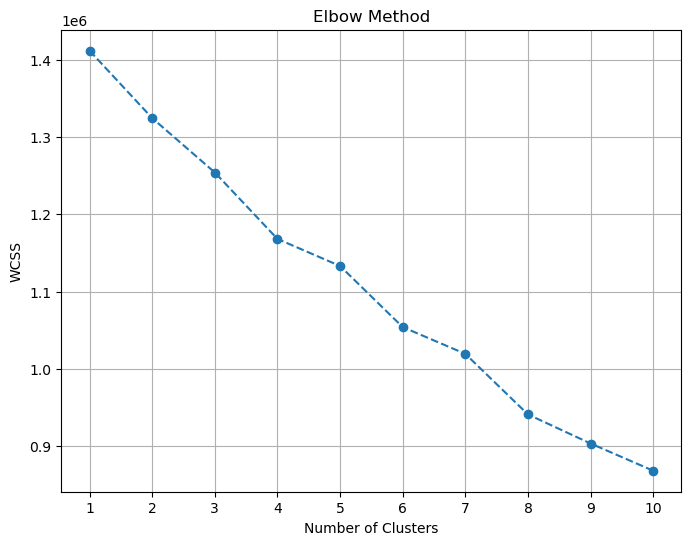

In [15]:
wcss = [] #within cluster sum of squares
for i in range(1, 11): # trying clusters from 1 to 10
    kmeans =  KMeans(n_clusters= i, n_init = 'auto', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()        
        

In [17]:
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# PCA on Kmeans

In [18]:
pca = PCA(n_components = 0.99, random_state = 42)
pca.fit(scaled_data)

PCA(n_components=0.99, random_state=42)

In [19]:
transformed_data = pca.transform(scaled_data)

In [20]:
transformed_data[:10]


array([[-0.91563063, -0.30969208,  2.28798616, -0.3685962 ,  2.91793887,
        -1.10336056, -0.57075204, -0.83578275,  0.50978045, -0.44227084,
        -0.32600726,  0.47998168,  0.10589894,  1.97576277,  0.14085284,
         0.18625058,  0.29527345, -0.80072849, -1.4336377 ,  2.1706202 ,
        -1.69789034, -1.85345413,  0.00661127, -0.48074097,  0.18295912,
        -0.89265767, -0.28423044, -0.91855512,  0.02470731,  0.04551604,
         0.07311377, -0.24108368, -0.15904305,  0.20384169, -0.48814262],
       [-0.54857254, -0.16664209,  2.26984294, -0.35328169,  2.82119224,
        -0.99202901, -0.4099636 , -0.73918802,  0.87436639,  0.6327416 ,
        -0.79579985,  0.14041984,  0.94251653,  2.10410351, -0.08865724,
         0.32145152,  0.38500245, -0.65147386, -1.47412555,  2.10301907,
        -1.68703928, -1.83926571,  0.05565427,  0.07206188,  0.56591077,
         0.25085049,  0.70026819, -1.56333408,  1.05339364, -0.04100928,
         0.41151926,  0.3468589 , -0.18489041, -0.

In [21]:
pca.components_

array([[ 0.10131289,  0.17420877, -0.38492441, ...,  0.07962301,
         0.04207042,  0.13929565],
       [-0.00918231, -0.31613709, -0.141229  , ..., -0.12953732,
        -0.04094372,  0.08185263],
       [ 0.17142575,  0.07413226,  0.11491414, ..., -0.08922431,
         0.18628075, -0.09257159],
       ...,
       [-0.06810143,  0.02305112, -0.00502005, ...,  0.12202407,
         0.06847825, -0.00931237],
       [ 0.29541171, -0.28857677,  0.22772057, ..., -0.01827112,
        -0.02925854, -0.06792506],
       [ 0.10488007, -0.61950444,  0.04081625, ...,  0.10600797,
         0.02187399,  0.03090445]])

# Hierarical clustering

In [22]:
agg_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold =0).fit(scaled_data)

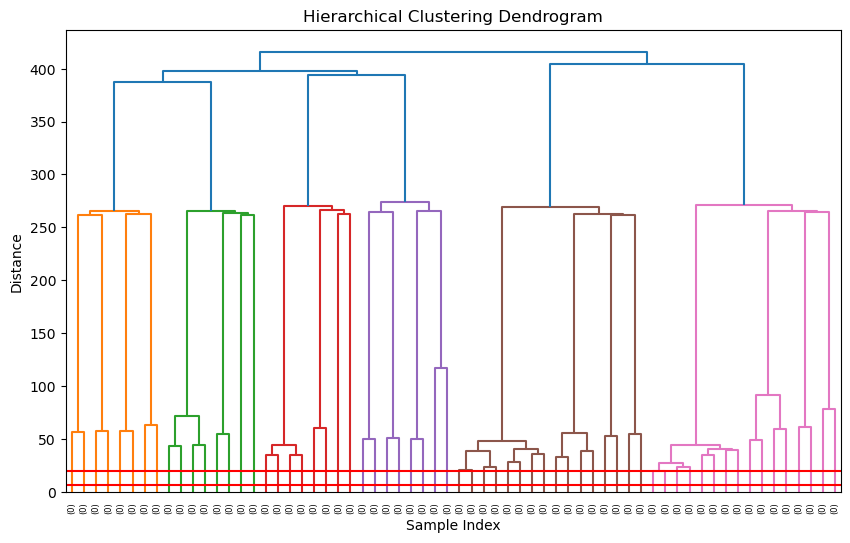

In [23]:
def plot_dendrogram(model, **kwargs):
    linkage_matrix = np.column_stack([model.children_, model.distances_, np.zeros(model.distances_.shape[0])]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.hlines(20, 0, 10000, 'r')
plt.hlines(7, 0, 10000, 'r')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show() 

# DBSCAN

In [24]:
X = df[['acousticness', 'energy']]
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(X)
df[['acousticness', 'energy']] = scaled_data

In [25]:
db = DBSCAN(eps = 0.5, min_samples = 3).fit(scaled_data)

In [26]:
clusters = db.fit_predict(scaled_data)

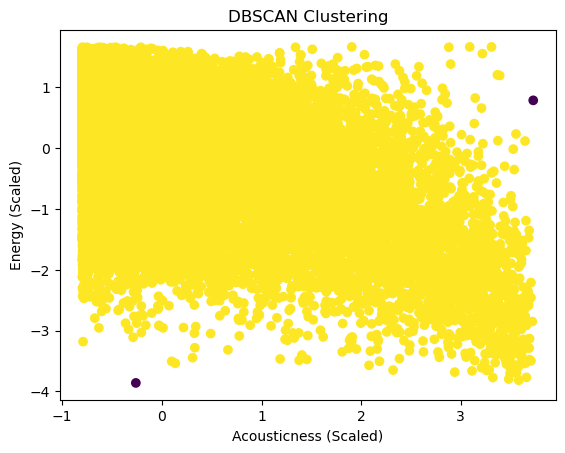

In [27]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()

In [28]:
db1 = DBSCAN(eps = 0.3, min_samples = 3).fit(scaled_data)

In [29]:
clusters = db1.fit_predict(scaled_data)

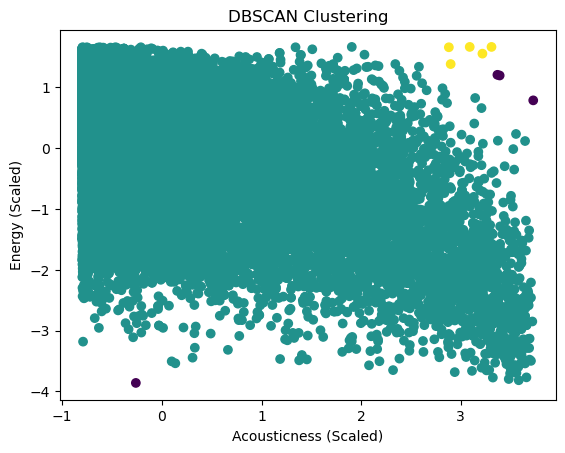

In [30]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Acousticness (Scaled)')
plt.ylabel('Energy (Scaled)')
plt.title('DBSCAN Clustering')
plt.show()